# Submission for the AIcrowd Blitz Challenge DIBRD

Author - Animesh Sinha

Based off template by - Shubham Sharma

To open the original template notebook on Google Computing platform Colab, click below!

## Comments on the Solution

This notebook is a failed example of some data engineering with fit attempts using Decision Trees, Random Forests, and a Neural Network. (Support Vector Machines to be added).

The results of said analysis were not very good, more needs to be done about it.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/761175b71c995e5a44a0877daf9e0597)


# Preparing the DataSet

## Download dataset

The first step is to download out train test data. We will be training a classifier on the train data and make predictions on test data. We submit our predictions

In [1]:
!rm -rf data
!mkdir data
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/train.csv -O data/train.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/test.csv -O data/test.csv

--2020-05-18 19:04:30--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/train.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.16, 130.117.252.12, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116826 (114K) [text/csv]
Saving to: ‘data/train.csv’

data/train.csv      100%[===================>] 114.09K  --.-KB/s    in 0.03s   

2020-05-18 19:04:30 (3.54 MB/s) - ‘data/train.csv’ saved [116826/116826]

--2020-05-18 19:04:32--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/dibrd/v0.1/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.16, 130.117.252.12, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiti


## Import packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score

## Load Data
We use pandas library to load our data. Pandas loads them into dataframes which helps us analyze our data easily. Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm)

In [0]:
train_data_path = "data/train.csv" #path where data is stored

In [0]:
train_data = pd.read_csv(train_data_path,header=None) #load data in dataframe using pandas

## Visualise the Dataset

In [5]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,75,63,60,55,48,35,13.195493,4.396967,0.104070,0.000000,0.000000,0.000000,0.000000,0.000000,0.513092,0.123966,0,1
1,1,1,79,76,74,72,69,50,61.559348,28.959444,12.778104,2.045287,0.038016,0.000000,0.000000,0.000000,0.527993,0.101884,0,1
2,1,1,41,41,40,40,38,35,6.090116,0.834492,0.027460,0.000000,0.000000,0.000000,0.000000,0.000000,0.506881,0.091535,1,0
3,1,1,17,16,16,14,12,9,75.438535,20.352500,5.237412,0.206817,0.003884,0.000971,0.000971,0.000971,0.544614,0.089329,1,1
4,1,1,63,63,63,59,57,48,13.558211,5.366467,0.604079,0.051511,0.000000,0.000000,0.000000,0.000000,0.552941,0.112387,0,1


You can see the columns goes from 0 to 19, where columns from 0 to 18 represents features extracted from the image set and last column represents the type of patient i.e 1 if if signs of Diabetic Retinopathy is present else 0.

# Exploratory Data Analysis

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


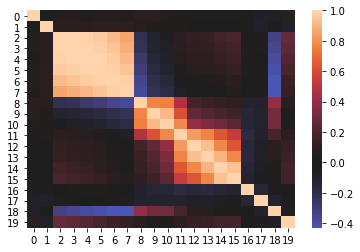

In [7]:
sns.heatmap(train_data.corr(), center=0.0)

Number of Entries: 920


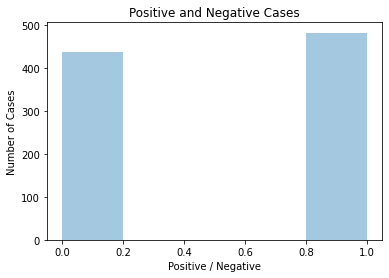

In [8]:
sns.distplot(train_data[19], kde=False)
print('Number of Entries:', len(train_data))
plt.title('Positive and Negative Cases')
plt.xlabel('Positive / Negative')
plt.ylabel('Number of Cases')
plt.show()

In [0]:
def normalize(series):
    return (series - series.mean()) / series.std()

def plot_feature_value(df, features, norm=False, log=False):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax = np.reshape(ax, -1)

    for i in range(len(features)):
        if norm:
            sns.distplot(normalize(df[features[i]]), ax=ax[0], hist=False, label='Feature {}'.format(features[i]))
        else:
            sns.distplot(df[features[i]], ax=ax[0], hist=False, label='Feature {}'.format(features[i]))
    ax[0].set_title('For All')
    ax[0].set_xlabel('Feature Value')
    ax[0].set_ylabel('Frequency')

    for i in range(len(features)):
        if norm:
            sns.distplot(normalize(df[df[19] == 0][features[i]]), ax=ax[1], hist=False, label='Feature {}'.format(features[i]))
        else:
            sns.distplot(df[df[19] == 0][features[i]], ax=ax[1], hist=False, label='Feature {}'.format(features[i]))
    ax[1].set_title('For Negative')
    ax[1].set_xlabel('Feature Value')
    ax[1].set_ylabel('Frequency')

    for i in range(len(features)):
        if norm:
            sns.distplot(normalize(df[df[19] == 1][features[i]]), ax=ax[2], hist=False, label='Feature {}'.format(features[i]))
        else:
            sns.distplot(df[df[19] == 1][features[i]], ax=ax[2], hist=False, label='Feature {}'.format(features[i]))
    ax[2].set_title('For Positive')
    ax[2].set_xlabel('Feature Value')
    ax[2].set_ylabel('Frequency')

    if log:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        ax[2].set_yscale('log')

    fig.suptitle('Feature Value Distribution for each result' + (' (Normalized)' if norm else ''))
    plt.show()

In [0]:
def plot_feature_results(df, features, log=True):
    cols = 2 if len(features) % 2 == 0 else 3
    fig, ax = plt.subplots((len(features) + cols - 1) // cols, cols,
                           figsize=(15, (len(features) + cols - 1) // cols * 5))
    ax = np.reshape(ax, -1)

    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=ax[i])
        sns.distplot(df[df[19] == 0][features[i]], ax=ax[i])
        sns.distplot(df[df[19] == 1][features[i]], ax=ax[i])
        ax[i].legend(['All', 'Negative', 'Positive'])
        ax[i].set_title('Feature {}'.format(features[i]))
        ax[i].set_xlabel('Feature {}'.format(features[i]))
        ax[i].set_ylabel('Frequency')
        if log:
            ax[i].set_yscale('log')
    fig.suptitle('Feature Value Distribution for each result')
    plt.show()

In [0]:
COUNT_POSITIVE, COUNT_NEGATIVE = len(train_data[train_data[19] == 1]), len(train_data[train_data[19] == 0])

## Features 2 - 7

Here we start exploring the highly correlated features 2 through 7 and their effect on the result.


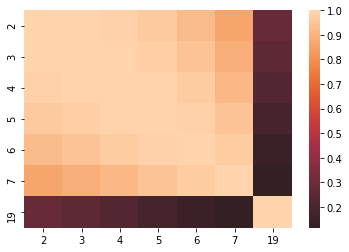

In [12]:
sns.heatmap(train_data[[2, 3, 4, 5, 6, 7, 19]].corr(), center=0.0)

In [13]:
train_data[[2, 3, 4, 5, 6, 7, 19]].describe()

,2,3,4,5,6,7,19
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,38.316304,36.791304,35.010870,32.181522,28.673913,21.064130,0.523913
std,25.179680,23.678384,22.433359,20.835192,19.274834,14.887508,0.499699
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,16.000000,15.000000,13.750000,11.000000,8.000000,0.000000
50%,36.000000,35.000000,32.000000,30.000000,25.500000,18.000000,1.000000
75%,55.000000,53.000000,51.000000,47.250000,43.000000,32.000000,1.000000
max,147.000000,132.000000,113.000000,94.000000,86.000000,77.000000,1.000000


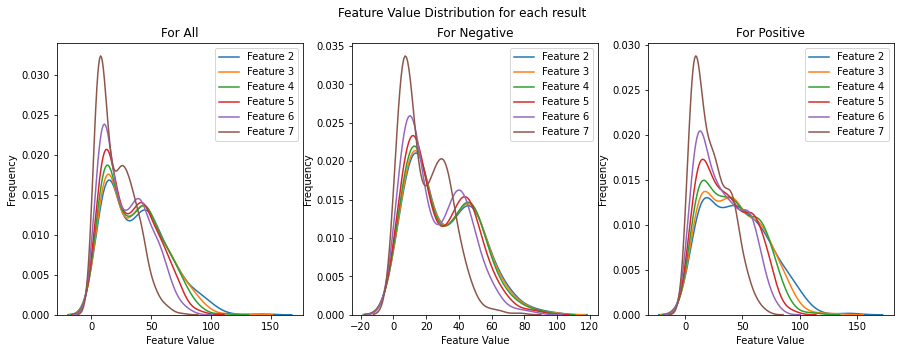

In [14]:
plot_feature_value(train_data, [2, 3, 4, 5, 6, 7])

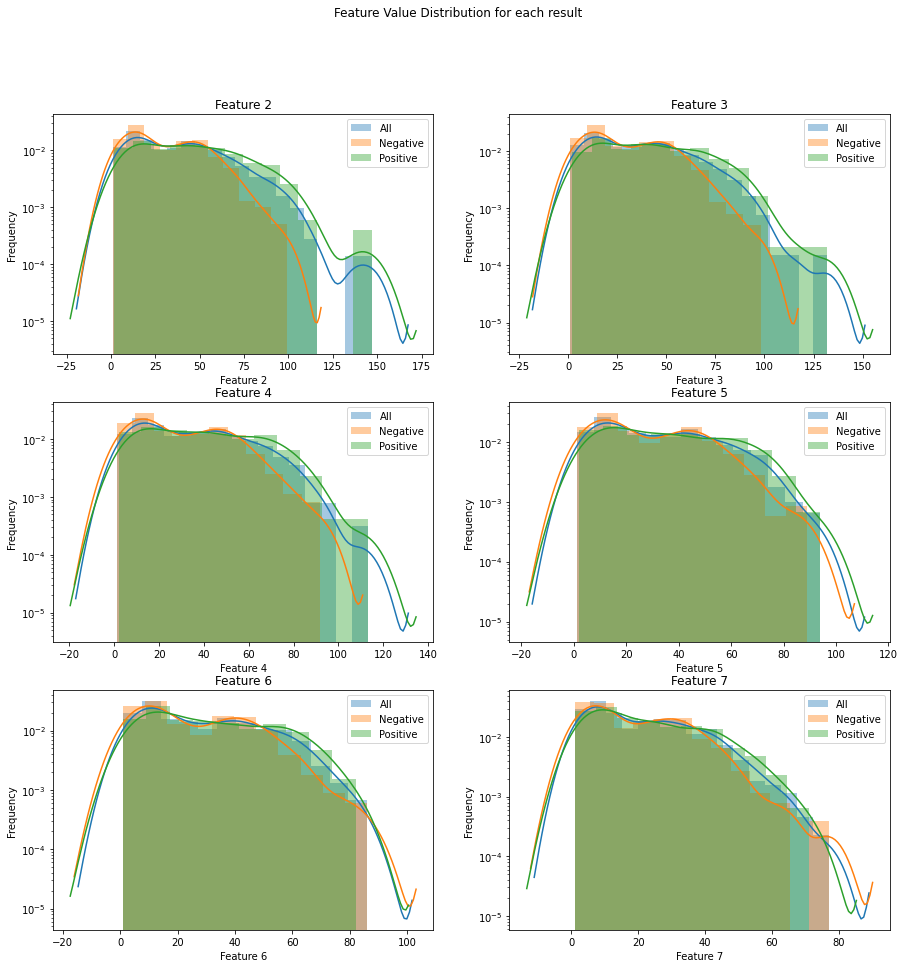

In [15]:
plot_feature_results(train_data, [2, 3, 4, 5, 6, 7])

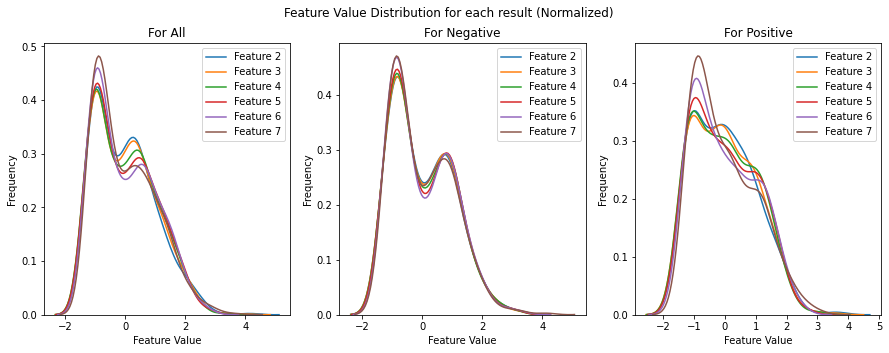

In [16]:
plot_feature_value(train_data, [2, 3, 4, 5, 6, 7], norm=True)

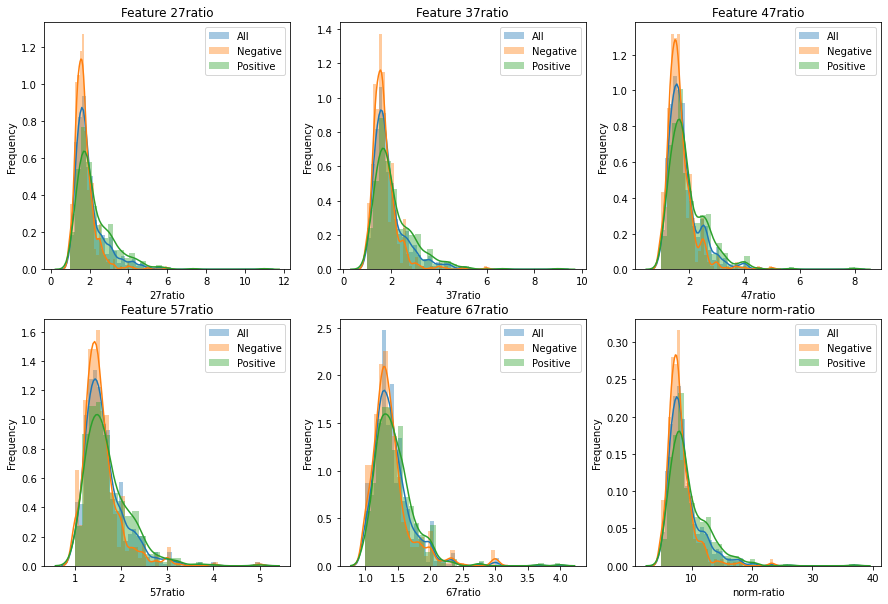

In [17]:
def append_features(df):
    df['27ratio'] = df[2] / df[7]
    df['37ratio'] = df[3] / df[7]
    df['47ratio'] = df[4] / df[7]
    df['57ratio'] = df[5] / df[7]
    df['67ratio'] = df[6] / df[7]
    df['norm-ratio'] = (df[2] + df[3] + df[4] + df[5] + df[6]) / df[7]
append_features(train_data)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = np.reshape(ax, -1)
for idx, feature in enumerate(['27ratio', '37ratio', '47ratio', '57ratio', '67ratio', 'norm-ratio']):
    sns.distplot(train_data[feature], ax=ax[idx])
    sns.distplot(train_data[train_data[19] == 0][feature], ax=ax[idx])
    sns.distplot(train_data[train_data[19] == 1][feature], ax=ax[idx])
    ax[idx].legend(['All', 'Negative', 'Positive'])
    ax[idx].set_title('Feature ' + feature)
    ax[idx].set_xlabel(feature)
    ax[idx].set_ylabel('Frequency')
plt.show()

The **3-7 ratio is the best feature indicator** for this dataset.
The individual values do not seems of much value, nevertheless we shall keep one scale value for the whole dataset. 

## Features 8 - 11

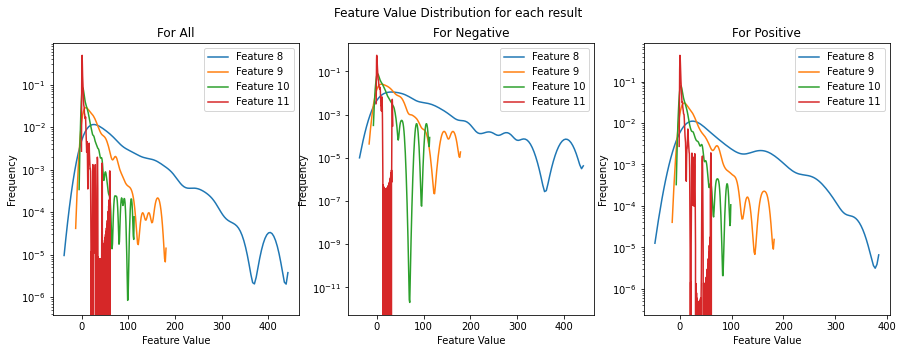

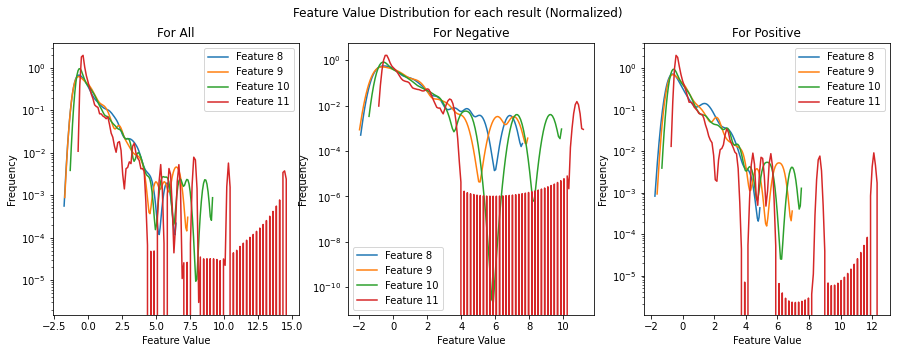

In [18]:
plot_feature_value(train_data, [8, 9, 10, 11], log=True)
plot_feature_value(train_data, [8, 9, 10, 11], norm=True, log=True)

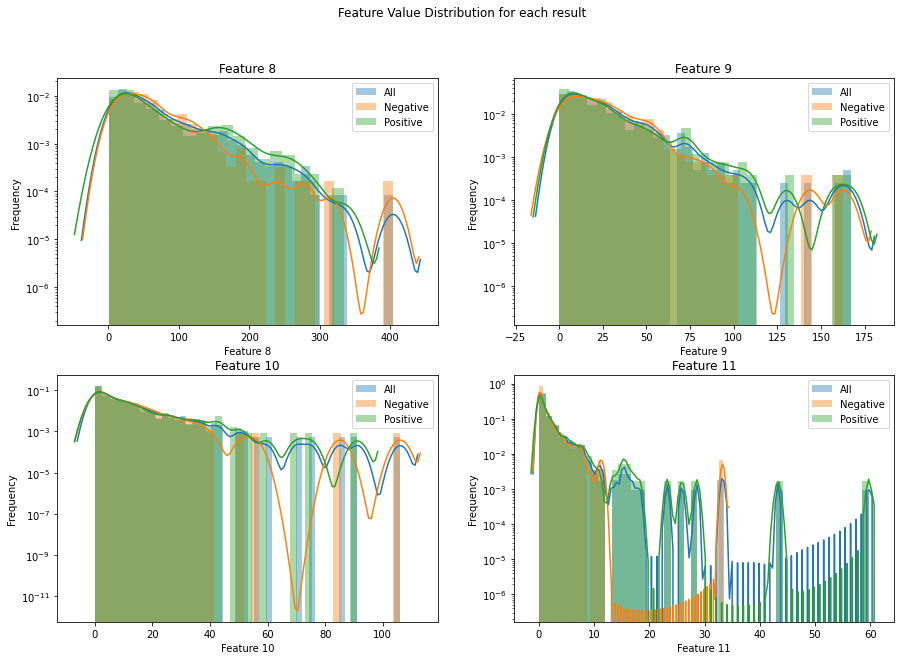

In [19]:
plot_feature_results(train_data, [8, 9, 10, 11])

## Features 11-14

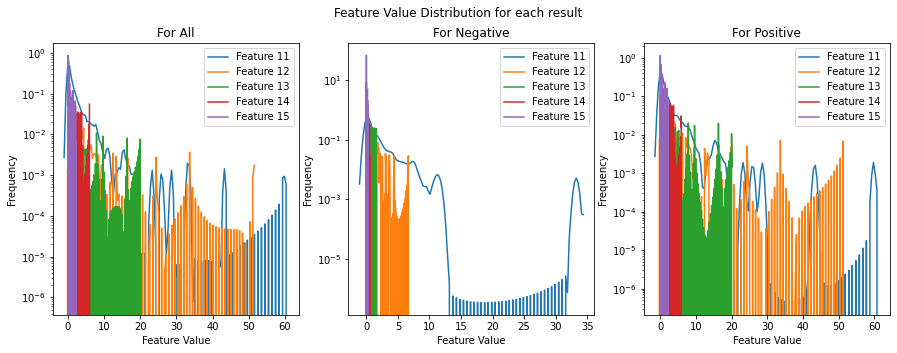

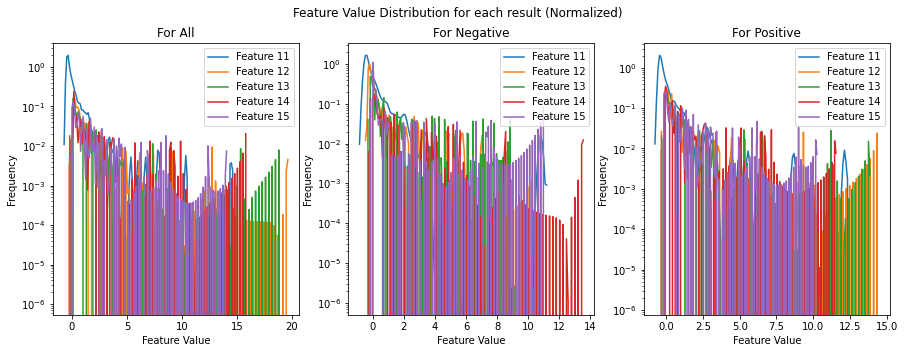

In [20]:
plot_feature_value(train_data, [11, 12, 13, 14, 15], log=True)
plot_feature_value(train_data, [11, 12, 13, 14, 15], norm=True, log=True)

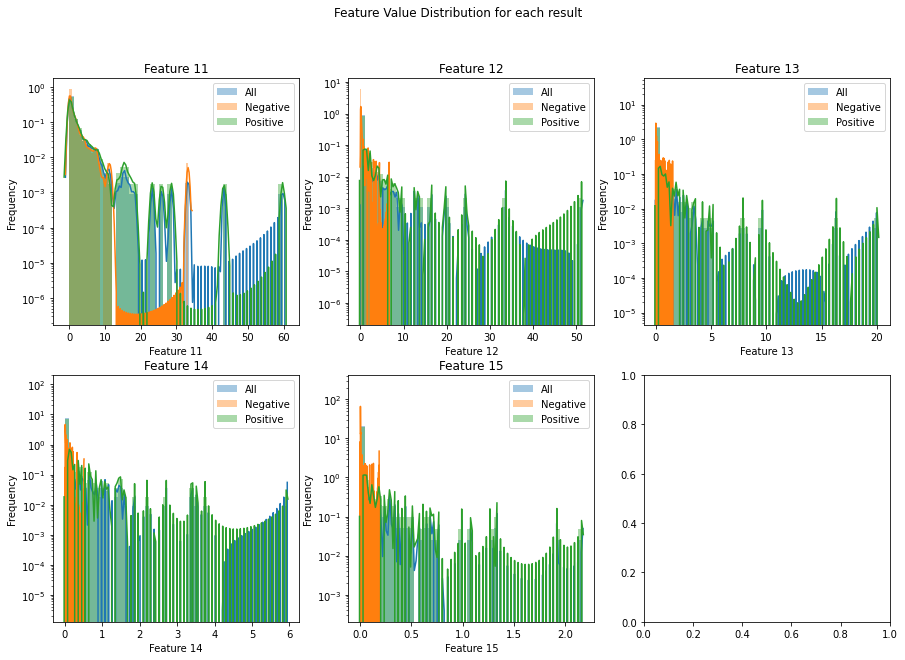

In [21]:
plot_feature_results(train_data, [11, 12, 13, 14, 15], log=True)

## Features 1-2

The Categorical Features are analyzed for their distribution here, along with the result.

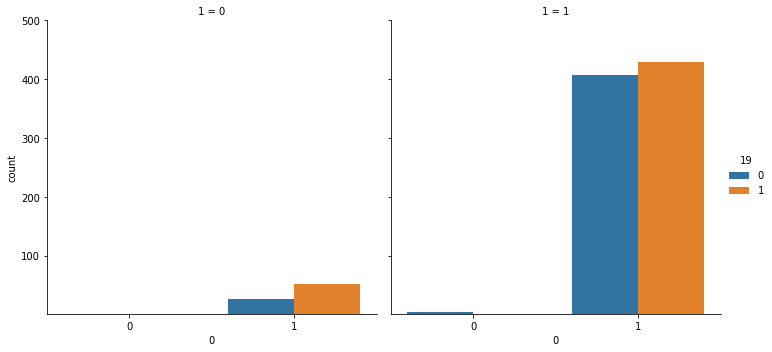

In [22]:
g = sns.catplot(x=0, hue=19, col=1, data=train_data, kind="count")
g.axes[0, 0].set_ylim(1, 500)
g.axes[0, 1].set_ylim(1, 500)
plt.show()

In [23]:
negative, positive = len(train_data[train_data[19] == 0]), len(train_data[train_data[19] == 1])
print('Negative Results: {} ({}%)'.format(negative, (100 * negative) / (negative + positive)))
print('Positive Results: {} ({}%)'.format(positive, (100 * positive) / (negative + positive)))

Negative Results: 438 (47.608695652173914%)
Positive Results: 482 (52.391304347826086%)


This seems to be some really poorly correlated data. Maybe there is one class (*Feature 0 is 0 and Feature 1 is 1*) which has a very few negative cases and no positive clases, but this may also be a false correlation. The positives are a little higher than the negatives.

The thing to note here is that **Feature 0 is 0 is really uncommon**. So we need to check if the same trend is following in the test set, and maybe manually check those examples.

It seems useful to just ignore this data, definitely ignore *Feature 0* and maybe also ignore *Feature 1*.

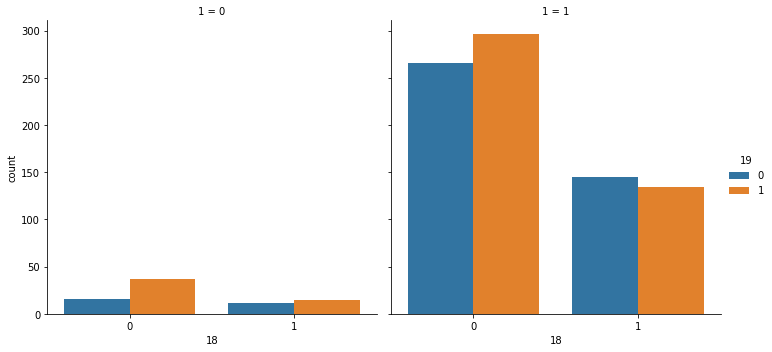

In [24]:
g = sns.catplot(x=18, hue=19, col=1, data=train_data, kind="count")

## Features 16-18

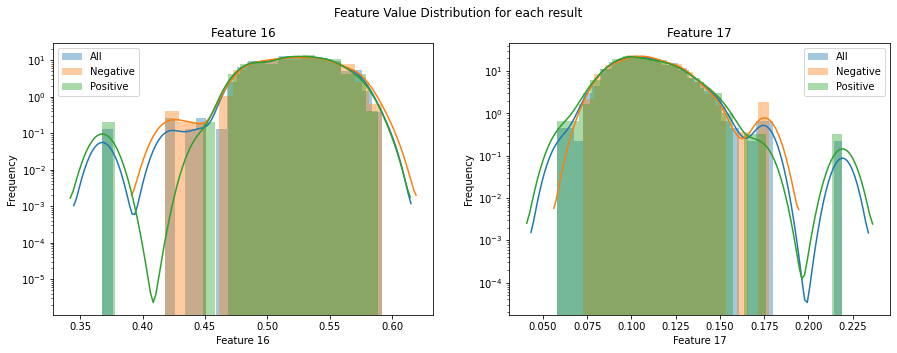

In [25]:
plot_feature_results(train_data, [16, 17])

# Split Data into Train and Validation
Now we want to see how well our classifier is performing, but we dont have the test data labels with us to check. What do we do ? So we split our dataset into train and validation. The idea is that we test our classifier on validation set in order to get an idea of how well our classifier works. This way we can also ensure that we dont [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) on the train dataset. There are many ways to do validation like [k-fold](https://machinelearningmastery.com/k-fold-cross-validation/),[leave one out](https://en.wikipedia.org/wiki/Cross-validation_(statistics), etc

In [26]:
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, '57ratio', 19]
features_train_data = train_data[features]
features_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,57ratio,19
0,1,1,75,63,60,55,48,35,13.195493,4.396967,0.104070,0.000000,0.000000,0.000000,0.000000,0.513092,0.123966,0,1.571429,1
1,1,1,79,76,74,72,69,50,61.559348,28.959444,12.778104,2.045287,0.038016,0.000000,0.000000,0.527993,0.101884,0,1.440000,1
2,1,1,41,41,40,40,38,35,6.090116,0.834492,0.027460,0.000000,0.000000,0.000000,0.000000,0.506881,0.091535,1,1.142857,0
3,1,1,17,16,16,14,12,9,75.438535,20.352500,5.237412,0.206817,0.003884,0.000971,0.000971,0.544614,0.089329,1,1.555556,1
4,1,1,63,63,63,59,57,48,13.558211,5.366467,0.604079,0.051511,0.000000,0.000000,0.000000,0.552941,0.112387,0,1.229167,1


In [0]:
X_train, X_val = train_test_split(features_train_data, test_size=0.2, random_state=42, shuffle=True)

Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Now, since we have our data splitted into train and validation sets, we need to get the label separated from the data.

In [28]:
X_train, y_train = X_train.iloc[:, :-1], X_train.iloc[:, -1]
X_val, y_val = X_val.iloc[:, :-1], X_val.iloc[:, -1]
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(736, 19) (184, 19) (736,) (184,)


# Decision Trees and Regression Forests

## Logistics Regressor

Now we come to the juicy part. We have fixed our data and now we train a classifier. The classifier will learn the function by looking at the inputs and corresponding outputs. There are a ton of classifiers to choose from some being [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), [SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Random Forests](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Decision Trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052), etc.   
Tip: A good model doesnt depend solely on the classifier but on the features(columns) you choose. So make sure to play with your data and keep only whats important. 

In [0]:
model_regressor = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

We have used [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) as a classifier here and set few of the parameteres. But one can set more parameters and increase the performance. To see the list of parameters visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We can also use other classifiers. To read more about sklean classifiers visit [here](https://scikit-learn.org/stable/supervised_learning.html). Try and use other classifiers to see how the performance of your model changes.

In [30]:
model_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

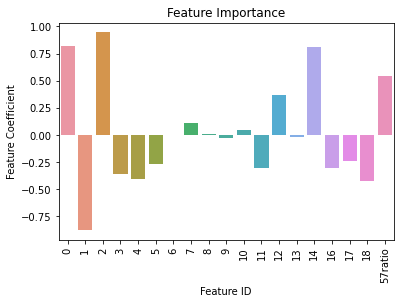

In [31]:
from matplotlib import pyplot as plt

importance = model_regressor.coef_[0]
sns.barplot(x=list(range(len(importance))), y=importance)
plt.xticks(range(len(features) - 1), features[:-1], rotation='vertical')
plt.xlabel('Feature ID')
plt.ylabel('Feature Coefficient')
plt.title('Feature Importance')
plt.show()

In [0]:
def evaluate_predictions(y_pred, y_val):
    precision = precision_score(y_val, y_pred, average='micro')
    recall = recall_score(y_val, y_pred, average='micro')
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')

    print("Accuracy of the model is:", accuracy)
    print("Recall of the model is:", recall)
    print("Precision of the model is:", precision)
    print("F1 score of the model is:", f1)

In [33]:
evaluate_predictions(model_regressor.predict(X_val), y_val)

Accuracy of the model is: 0.7282608695652174
Recall of the model is: 0.7282608695652174
Precision of the model is: 0.7282608695652174
F1 score of the model is: 0.7271001423825345


## Random Forest Classifier

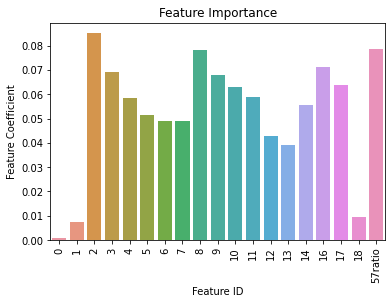

Accuracy of the model is: 0.6467391304347826
Recall of the model is: 0.6467391304347826
Precision of the model is: 0.6467391304347826
F1 score of the model is: 0.6467286959090237


In [34]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=300,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2)
model_forest.fit(X_train, y_train)
importance = model_forest.feature_importances_
sns.barplot(x=list(range(len(importance))), y=importance)
plt.xlabel('Feature ID')
plt.ylabel('Feature Coefficient')
plt.title('Feature Importance')
plt.xticks(range(len(features) - 1), features[:-1], rotation='vertical')
plt.show()
evaluate_predictions(model_forest.predict(X_val), y_val)

## XGBoost Tree Classifiers

Now moving to XGBoost both as the model of choice, and to get the feature importances so that better ideas can be explored later down the road.

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 10),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}
# Perform random search: grid_mse
xgb_classifier = xgb.XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = xgb_classifier, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)
# Fit randomized_mse to the data
xgb_random.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)


y_pred = np.asarray([np.argmax(line) for line in xgb_random.predict(X_val)])
evaluate_predictions(y_pred, y_val)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'n_estimators': 8, 'max_depth': 8, 'learning_rate': 0.4, 'colsample_bytree': 0.7}
Best accuracy found:  0.6752717391304347
Accuracy of the model is: 0.5163043478260869
Recall of the model is: 0.5163043478260869
Precision of the model is: 0.5163043478260869
F1 score of the model is: 0.34050179211469533


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


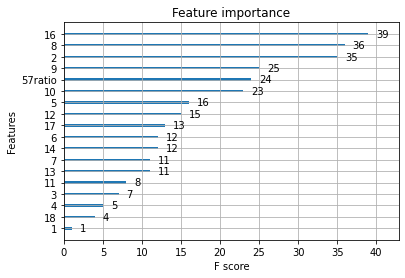

In [36]:
xgb.plot_importance(xgb_random.best_estimator_)
plt.show()

Well this was unhelpful, almost every feature group appears, and even the first feature did not get knocked out. Let's more to a more complex model to see if we can get some better info.

**TODO: Figure out why this did not work**.

## TensorFlow Neural Network

Here we construct a neural network, deeper than the linear regressor.

### Tensorflow Helper Code

Trying large boundary classifiers.

In [37]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
def plot_training(model):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(model.history.history['loss'])
    ax[0].plot(model.history.history['val_loss'])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss with Training')
    ax[0].legend(['Training', 'Validation'])
    ax[1].plot(model.history.history['accuracy'])
    ax[1].plot(model.history.history['val_accuracy'])
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy with Training')
    ax[1].legend(['Training', 'Validation'])
    fig.suptitle('Model Training')
    plt.show()

### Defining a Custom Layer

In [40]:
class Slice(tf.keras.layers.Layer):

    def __init__(self, begin, size):
        super(Slice, self).__init__()
        self.begin = [0, begin]
        self.size = [-1, size]

    def call(self, inputs):
        return tf.slice(inputs, self.begin, self.size, name='Slicer')

print(Slice(16, 3)(tf.constant([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 11, 18],
                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
                                [0, 1, 2, 9, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 13, 18],
                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])))

tf.Tensor(
[[16 11 18]
 [16 17 18]
 [16 13 18]
 [16 17 18]
 [16 17 18]], shape=(5, 3), dtype=int32)


### Setting up the Model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


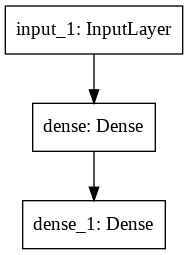

In [41]:
def make_model():
    input_vec = tf.keras.layers.Input((X_train.shape[1],))
    final = tf.keras.layers.Dense(3, activation='tanh')(input_vec)
    final = tf.keras.layers.Dense(1, activation='sigmoid')(final)

    model = tf.keras.models.Model(inputs=[input_vec], outputs=[final])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model_tfnn = make_model()
model_tfnn.summary()
tf.keras.utils.plot_model(model_tfnn, 'model.png')

In [42]:
model_tfnn.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 200,
    batch_size = 1,
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1),
    ]
)

Epoch 1/200
732/736 [============================>.] - ETA: 0s - loss: 0.7057 - accuracy: 0.5178
Epoch 00001: saving model to best_model.h5
736/736 [==============================] - 2s 3ms/step - loss: 0.7054 - accuracy: 0.5204 - val_loss: 0.6936 - val_accuracy: 0.5163
Epoch 2/200
729/736 [============================>.] - ETA: 0s - loss: 0.6958 - accuracy: 0.4952
Epoch 00002: saving model to best_model.h5
736/736 [==============================] - 2s 3ms/step - loss: 0.6957 - accuracy: 0.4959 - val_loss: 0.7029 - val_accuracy: 0.4837
Epoch 3/200
730/736 [============================>.] - ETA: 0s - loss: 0.6946 - accuracy: 0.5274
Epoch 00003: saving model to best_model.h5
736/736 [==============================] - 2s 3ms/step - loss: 0.6948 - accuracy: 0.5258 - val_loss: 0.6956 - val_accuracy: 0.4837
Epoch 4/200
722/736 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.5069
Epoch 00004: saving model to best_model.h5
736/736 [==============================] - 2s 3

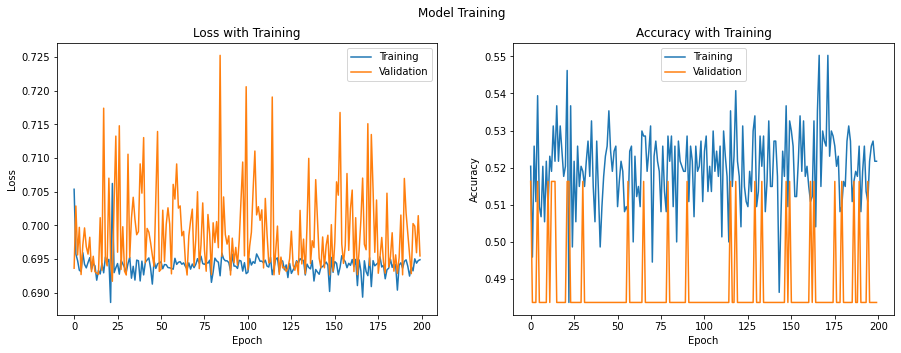

In [43]:
plot_training(model_tfnn)

# Prediction on Evaluation Set

In [44]:
y_pred = np.argmax(model_tfnn.predict(X_val), axis=1)
evaluate_predictions(y_pred, y_val)

Accuracy of the model is: 0.5163043478260869
Recall of the model is: 0.5163043478260869
Precision of the model is: 0.5163043478260869
F1 score of the model is: 0.34050179211469533


## Load Test Set
Load the test data now# Load the evaluation data

In [0]:
final_test_path = "data/test.csv"
final_test = pd.read_csv(final_test_path, header=None)

## Predict Test Set
Time for the moment of truth! Predict on test set and time to make the submission.

In [0]:
append_features(final_test)
final_test = final_test[features[:-1]]
submission = model_forest.predict(final_test)

In [47]:
np.mean(np.equal(model_forest.predict(final_test), model_regressor.predict(final_test)))

0.6782608695652174

## Save the prediction to csv

In [0]:
submission = pd.DataFrame(submission)
submission.to_csv('/tmp/submission.csv',header=['label'],index=False)

Note: Do take a look at the submission format.The submission file should contain a header.For eg here it is "label". 

## Save it in correct format

To download the generated csv in colab run the below command

In [0]:
from google.colab import files
files.download('/tmp/submission.csv') 

Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/dibrd). Participate in the challenge and submit the submission.csv generated.